In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import category_encoders as ce
import statsmodels.api as ssm
import statsmodels.tools.eval_measures as seval
import sklearn.preprocessing as skp
import sklearn.impute as imp

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("synthetic_data_regression.csv")

In [4]:
df.head()

,ID,Y1,Y2,Y3,Var1,Var2,Var3,Var4,Var5,Var6,...,Var32,Var33,CatVar0,CatVar1,CatVar2,CatVar3,CatVar4,CatVar5,CatVar6,CatVar7
0,0,83.757716,-11.374746,26.373839,-0.001280,-0.000019,-0.002674,0.000825,-0.000298,0.000331,...,-24099.421600,19587.850010,PQR,X,one,X,Y,EFG,three,Y
1,1,91.517378,-12.630470,25.703212,-0.002516,-0.000374,-0.000643,-0.001604,0.002569,0.000601,...,-1920.670332,-780.996277,Z,one,one,Y,MNO,PQR,three,three
2,2,85.794186,-11.511481,28.778470,0.002352,0.001389,0.002532,0.000628,0.000670,-0.000630,...,-3890.776204,-172.660412,PQR,PQR,one,X,Y,ABC,three,Y
3,3,87.979360,-12.180281,28.351211,-0.000375,-0.001630,-0.000916,-0.000958,0.001746,0.000099,...,1197.478152,-7673.252772,Y,Y,one,EFG,Z,PQR,Y,three
4,4,86.452012,-11.236202,29.498652,0.001180,-0.000804,-0.000551,-0.001142,0.001717,0.001673,...,11315.845950,-7166.860132,Y,PQR,one,X,Z,X,Y,three


In [5]:
df.shape

(100000, 45)

In [6]:
df_cols = df.columns

In [7]:
i = 1
for c in df_cols:
    print("Variable", i, ": ", c)
    i += 1

Variable 1 :  ID
Variable 2 :  Y1
Variable 3 :  Y2
Variable 4 :  Y3
Variable 5 :  Var1
Variable 6 :  Var2
Variable 7 :  Var3
Variable 8 :  Var4
Variable 9 :  Var5
Variable 10 :  Var6
Variable 11 :  Var7
Variable 12 :  Var8
Variable 13 :  Var9
Variable 14 :  Var10
Variable 15 :  Var11
Variable 16 :  Var12
Variable 17 :  Var13
Variable 18 :  Var14
Variable 19 :  Var15
Variable 20 :  Var16
Variable 21 :  Var17
Variable 22 :  Var18
Variable 23 :  Var19
Variable 24 :  Var20
Variable 25 :  Var21
Variable 26 :  Var22
Variable 27 :  Var23
Variable 28 :  Var24
Variable 29 :  Var25
Variable 30 :  Var26
Variable 31 :  Var27
Variable 32 :  Var28
Variable 33 :  Var29
Variable 34 :  Var30
Variable 35 :  Var31
Variable 36 :  Var32
Variable 37 :  Var33
Variable 38 :  CatVar0
Variable 39 :  CatVar1
Variable 40 :  CatVar2
Variable 41 :  CatVar3
Variable 42 :  CatVar4
Variable 43 :  CatVar5
Variable 44 :  CatVar6
Variable 45 :  CatVar7


In [8]:
#There are 2 NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 45 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       100000 non-null  int64  
 1   Y1       100000 non-null  float64
 2   Y2       100000 non-null  float64
 3   Y3       100000 non-null  float64
 4   Var1     100000 non-null  float64
 5   Var2     100000 non-null  float64
 6   Var3     100000 non-null  float64
 7   Var4     100000 non-null  float64
 8   Var5     100000 non-null  float64
 9   Var6     100000 non-null  float64
 10  Var7     100000 non-null  float64
 11  Var8     100000 non-null  float64
 12  Var9     100000 non-null  float64
 13  Var10    100000 non-null  float64
 14  Var11    100000 non-null  float64
 15  Var12    100000 non-null  float64
 16  Var13    100000 non-null  float64
 17  Var14    100000 non-null  float64
 18  Var15    100000 non-null  float64
 19  Var16    100000 non-null  float64
 20  Var17    100000 non-null  f

In [9]:
df.describe()

,ID,Y1,Y2,Y3,Var1,Var2,Var3,Var4,Var5,Var6,...,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,87.248616,-11.697565,27.533170,0.000004,0.000002,2.939170e-06,-0.000003,0.000003,-0.000002,...,5.696067,3.190854,1.590234,47.678929,16.440528,-43.428855,-5.759525,-11.688151,77.960692,-22.142038
std,28867.657797,3.984697,0.637874,2.882042,0.001741,0.001483,1.402047e-03,0.001402,0.001697,0.001143,...,7868.168615,8939.930334,9904.190963,7157.749267,8850.488099,8740.151812,6721.335300,10562.579298,9974.982681,8757.587752
min,0.000000,68.628714,-14.527156,1.901104,-0.007307,-0.006308,-5.447208e-03,-0.006183,-0.008319,-0.004784,...,-49327.084990,-60121.862310,-72857.184090,-45910.873940,-51624.484540,-52919.758000,-43612.961970,-63768.255680,-59571.721940,-72730.688000
25%,24999.750000,84.543322,-12.130285,26.249292,-0.001173,-0.000997,-9.424930e-04,-0.000954,-0.001140,-0.000772,...,-3589.056090,-4087.050978,-4506.268811,-3174.409128,-4015.144063,-4013.225416,-3048.562854,-4803.195738,-4431.965884,-3976.717492
50%,49999.500000,87.253163,-11.697218,27.964638,0.000003,0.000005,-6.290000e-07,-0.000003,0.000009,-0.000007,...,-16.543142,6.586580,1.945477,10.247751,-6.017313,-20.378875,-14.351688,3.061218,21.533146,-6.951980
75%,74999.250000,89.942698,-11.268642,29.369648,0.001173,0.001002,9.509073e-04,0.000946,0.001145,0.000771,...,3524.770690,4110.734479,4505.315497,3250.639704,4000.775402,3887.713389,3047.274189,4728.996445,4577.359839,3924.552143
max,99999.000000,104.814590,-8.485501,37.129631,0.007585,0.006354,5.981167e-03,0.005852,0.007529,0.004909,...,48806.559040,58226.785670,64335.330060,55157.420750,55262.122720,49217.946250,37811.721890,67621.314370,62658.390910,54517.670220


In [10]:
# impute NaN as the most common value (there are only 2 NaN values)
# 
imputer = imp.SimpleImputer(strategy="most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns=df_cols)


In [12]:
cat_features = ["CatVar0", "CatVar1", "CatVar2", "CatVar3", "CatVar4", "CatVar5", "CatVar6", "CatVar7"]
non_x = ["ID", "Y1", "Y2", "Y3"]

# Save all Y dataframe for later scatterplot matrix
allY_df = pd.DataFrame(df, columns=["Y1", "Y2", "Y3"])

# Save continous X columns
continuousX_df = df.drop(cat_features + non_x, axis=1)
continuousX_cols = continuousX_df.columns

In [13]:
# One Hot Encoding was chosen due to best performance with both Ys (Y1 and Y2)
# Binary performed equally well, but due to a small number of variables, One Hot was chosen
enc = ce.OneHotEncoder(cols=cat_features, use_cat_names=True, return_df=True)

df = enc.fit_transform(df)
df = df.astype("float64")

C:\Users\krash\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [14]:
# Prepare all X variable dataframe for OLS modeling against each Y
allX_df = df.drop(non_x, axis=1)
allX_cols = allX_df.columns

<AxesSubplot:>

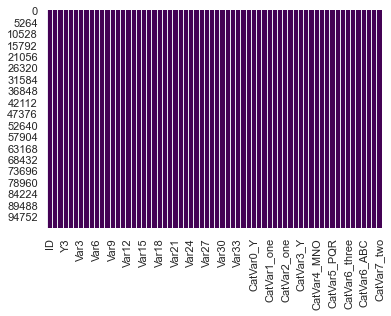

In [15]:
#double check for NULLs and NaNs
sb.set()
sb.heatmap(df.isnull(), cbar=False, cmap='viridis')

<AxesSubplot:>

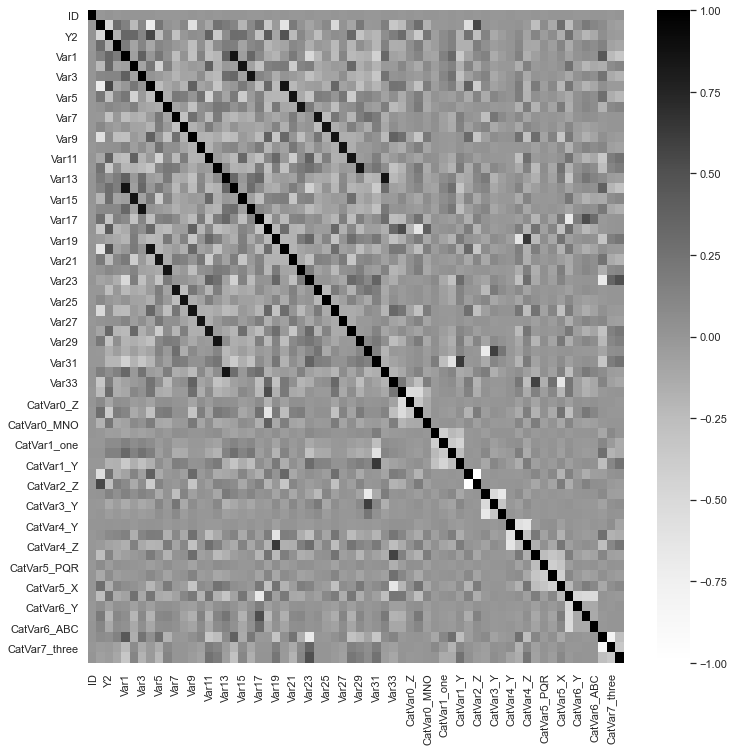

In [16]:
#overview correlation plot - looks like some of these datapoints are basically identical: Var1 and Var14, for example
plt.figure(figsize=(12,12))
sb.heatmap(df.corr(),cmap='Greys',annot=False)

<AxesSubplot:xlabel='Y1', ylabel='Count'>

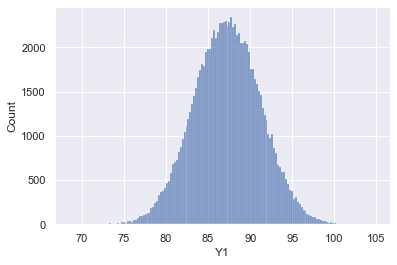

In [17]:
# Outcome variable distributions, Y1
sb.histplot(df['Y1'],kde = False)

<AxesSubplot:xlabel='Y2', ylabel='Count'>

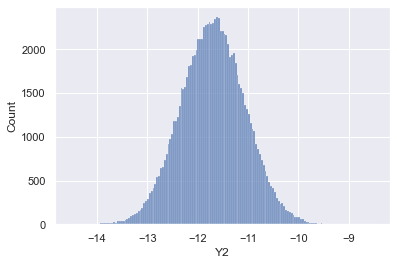

In [18]:
# Outcome variable distributions, Y2
sb.histplot(df['Y2'],kde = False)

Y3 minimum:  1.901104194
Y3 mean:  27.533170050433906
Y3 maximum:  37.12963109


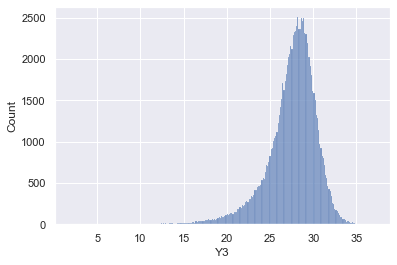

In [19]:
# Outcome variable distributions, Y3
# NOTE: this data is left-tailed and has outliers
sb.histplot(df['Y3'],kde = False)
print("Y3 minimum: ", df['Y3'].min())
print("Y3 mean: ", df['Y3'].mean())
print("Y3 maximum: ", df['Y3'].max())

<AxesSubplot:xlabel='Y1'>

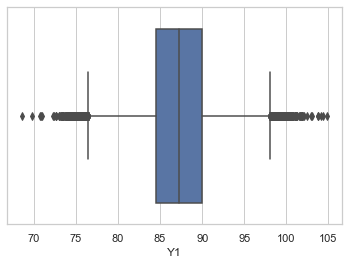

In [20]:
# Box plots for outcome variables - checking on outliers
sb.set_theme(style="whitegrid")
sb.boxplot(x=df["Y1"])

<AxesSubplot:xlabel='Y2'>

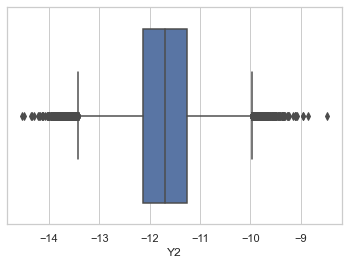

In [21]:
sb.boxplot(x=df["Y2"])

<AxesSubplot:xlabel='Y3'>

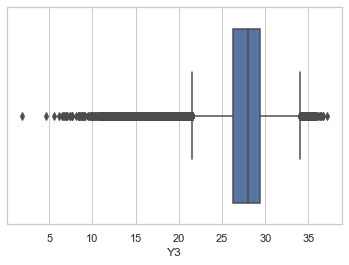

In [22]:
sb.boxplot(x=df["Y3"])

In [23]:
# Apply MinMaxScaler to the continous X / predictor variables
# MinMaxScaler scales the data while preserving the relationships and meanings of the data
mms = skp.MinMaxScaler()
allX_df[continuousX_cols] = mms.fit_transform(allX_df[continuousX_cols])


In [24]:
allX_df

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,CatVar5_PQR,CatVar5_ABC,CatVar5_X,CatVar6_three,CatVar6_Y,CatVar6_MNO,CatVar6_ABC,CatVar7_Y,CatVar7_three,CatVar7_two
0,0.404700,0.496650,0.242641,0.582286,0.506123,0.527719,0.577031,0.548025,0.574684,0.439609,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.321755,0.468644,0.420368,0.380498,0.686993,0.555618,0.633104,0.357275,0.672572,0.605114,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.648628,0.607895,0.698156,0.565972,0.567207,0.428557,0.561898,0.661939,0.655488,0.464793,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.465466,0.369411,0.396523,0.434168,0.635094,0.503852,0.512932,0.498650,0.544680,0.499813,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.569908,0.434672,0.428461,0.418863,0.633232,0.666221,0.549485,0.418966,0.397107,0.763208,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.464691,0.441833,0.400612,0.538935,0.547654,0.336133,0.581709,0.344214,0.635014,0.465706,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
99996,0.517070,0.441248,0.447444,0.341465,0.600251,0.677605,0.512955,0.824826,0.350972,0.440224,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,0.556638,0.670537,0.517438,0.666569,0.503512,0.654646,0.653180,0.536520,0.652447,0.573566,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99998,0.599007,0.463252,0.456391,0.655692,0.514986,0.619658,0.641730,0.388592,0.479490,0.379373,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


''

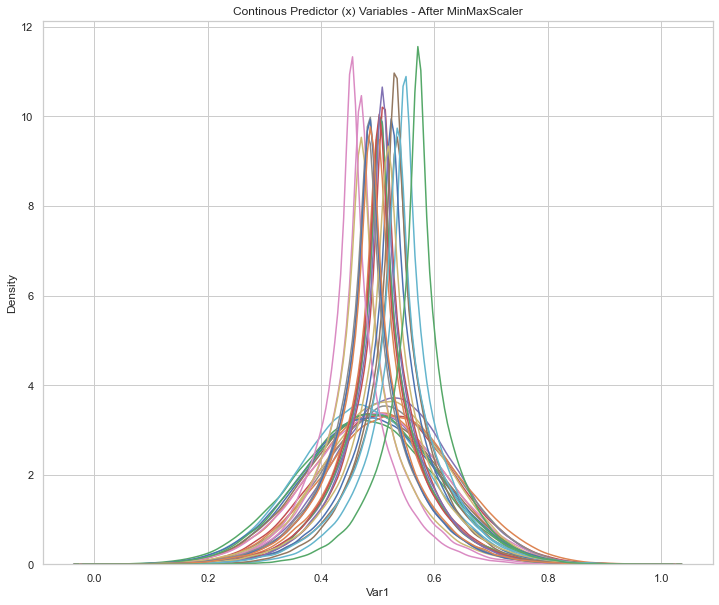

In [26]:
allX_df.typefig, (ax1) = plt.subplots(ncols=1, figsize=(12, 10))
ax1.set_title('Continous Predictor (x) Variables - After MinMaxScaler')

for c in continuousX_cols:
    sb.kdeplot(allX_df[c], ax=ax1)
;

In [32]:
allY_df = allY_df.astype("float64")
Y = allY_df["Y1"].copy()

In [33]:
X=ssm.add_constant(allX_df)

In [34]:
# Y1 OLS - R-squared = 0.8
model= ssm.OLS(Y,X).fit()
s= model.summary()
s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     7878.
Date:                Mon, 01 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:25:46   Log-Likelihood:            -1.9869e+05
No. Observations:              100000   AIC:                         3.975e+05
Df Residuals:                   99947   BIC:                         3.980e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            34.2633      0.067    514.383      0.000      34.133      34.394
Var1             -4.3485      0.110    -39.522      0.000      -4.564      -4.133
Var2             -0.2837      0.104     -2.733      0.006      -0.487      -0.080
Var3             -0.0190      0.097     -0.196      0.844      -0.209       0.171
Var4            -18.2606      0.105   -174.621      0.000     -18.466     -18.056
Var5              0.4445      0.117      3.802      0.000       0.215       0.674
Var6             -4.6108      0.099    -46.583      0.000      -4.805      -4.417
Var7              0.1490      0.101      1.478      0.140      -0.049       0.347
Var8             -0.4974      0.105     -4.752      0.000      -0.703      -0.292
Var9            -16.9299      0.116   -145.626      0.000     -17.158     -16.702
Var10            -4.3695      0.103    -42.290      0.000      -4.572      -4.167
Var11            -3.2143      0.103    -31.177      0.000      -3.416      -3.012
Var12             0.2397      0.100      2.395      0.017       0.044       0.436
Var13             0.5964      0.101      5.883      0.000       0.398       0.795
Var14            -0.2168      0.145     -1.498      0.134      -0.500       0.067
Var15             0.1385      0.142      0.978      0.328      -0.139       0.416
Var16             0.2567      0.134      1.915      0.056      -0.006       0.520
Var17             0.1057      0.110      0.963      0.336      -0.109       0.321
Var18            -0.7529      0.116     -6.506      0.000      -0.980      -0.526
Var19            -6.8265      0.108    -62.950      0.000      -7.039      -6.614
Var20             0.0184      0.156      0.118      0.906      -0.287       0.324
Var21             0.1594      0.140      1.137      0.255      -0.115       0.434
Var22            -0.0383      0.134     -0.285      0.776      -0.301       0.225
Var23            -0.3078      0.114     -2.694      0.007      -0.532      -0.084
Var24             0.3323      0.140      2.367      0.018       0.057       0.608
Var25             0.1513      0.149      1.013      0.311      -0.141       0.444
Var26             0.0409      0.156      0.263      0.793      -0.264       0.346
Var27             0.0103      0.159      0.065      0.948      -0.302       0.323
Var28             0.0121      0.136      0.089      0.929      -0.254       0.279
Var29            -0.0600      0.132     -0.456      0.648      -0.318       0.198
Var30            -0.1585      0.105     -1.512      0.130      -0.364       0.047
Var31            -1.6566      0.120    -13.823      0.000      -1.892      -1.422
Var32            -0.1178      0.136     -0.863      0.388      -0.385       0.150
Var33            -3.1273      0.140    -22.396      0.000      -3.401      -2.854
CatVar0_PQR       8.5631      0.020    428.367   

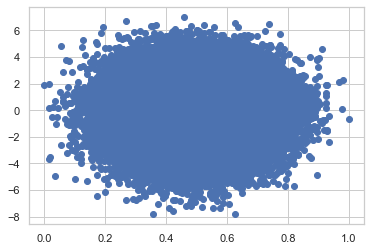

In [35]:
plt.scatter(model.model.exog[:,1], model.resid)

In [36]:
ypred = model.predict(X)
rmse = seval.rmse(Y, ypred)
rmse

1.764627005104102

In [37]:
Y = allY_df["Y2"].copy()

In [38]:
X=ssm.add_constant(allX_df)

In [39]:
# Y2 OLS - R-squared = 0.827
model= ssm.OLS(Y,X).fit()
s= model.summary()
s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 1.040e+04
Date:                Mon, 01 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:26:58   Log-Likelihood:                -4025.6
No. Observations:              100000   AIC:                             8157.
Df Residuals:                   99947   BIC:                             8661.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -5.0302      0.010   -528.995      0.000      -5.049      -5.012
Var1              3.0140      0.016    191.888      0.000       2.983       3.045
Var2              0.0238      0.015      1.608      0.108      -0.005       0.053
Var3              0.0225      0.014      1.632      0.103      -0.005       0.050
Var4              2.5164      0.015    168.565      0.000       2.487       2.546
Var5              0.0046      0.017      0.274      0.784      -0.028       0.037
Var6              1.1973      0.014     84.734      0.000       1.170       1.225
Var7             -0.0357      0.014     -2.477      0.013      -0.064      -0.007
Var8              0.0051      0.015      0.341      0.733      -0.024       0.034
Var9              0.1988      0.017     11.980      0.000       0.166       0.231
Var10             0.9931      0.015     67.326      0.000       0.964       1.022
Var11             2.5478      0.015    173.108      0.000       2.519       2.577
Var12            -0.0472      0.014     -3.303      0.001      -0.075      -0.019
Var13            -0.0239      0.014     -1.654      0.098      -0.052       0.004
Var14             0.0333      0.021      1.609      0.108      -0.007       0.074
Var15            -0.0292      0.020     -1.442      0.149      -0.069       0.010
Var16             0.0066      0.019      0.345      0.730      -0.031       0.044
Var17            -0.0423      0.016     -2.701      0.007      -0.073      -0.012
Var18             1.3022      0.017     78.833      0.000       1.270       1.335
Var19            -0.0162      0.015     -1.045      0.296      -0.047       0.014
Var20            -0.0095      0.022     -0.425      0.671      -0.053       0.034
Var21            -0.0435      0.020     -2.174      0.030      -0.083      -0.004
Var22             0.0173      0.019      0.905      0.365      -0.020       0.055
Var23             0.0314      0.016      1.924      0.054      -0.001       0.063
Var24            -0.0102      0.020     -0.511      0.610      -0.050       0.029
Var25            -0.0069      0.021     -0.326      0.745      -0.049       0.035
Var26             0.0306      0.022      1.374      0.169      -0.013       0.074
Var27            -0.0349      0.023     -1.533      0.125      -0.080       0.010
Var28             0.0391      0.019      2.013      0.044       0.001       0.077
Var29             0.0183      0.019      0.974      0.330      -0.019       0.055
Var30             0.0106      0.015      0.711      0.477      -0.019       0.040
Var31             0.2521      0.017     14.734      0.000       0.219       0.286
Var32            -0.0107      0.019     -0.548      0.584      -0.049       0.028
Var33             0.0986      0.020      4.945      0.000       0.059       0.138
CatVar0_PQR      -1.1905      0.003   -417.173   

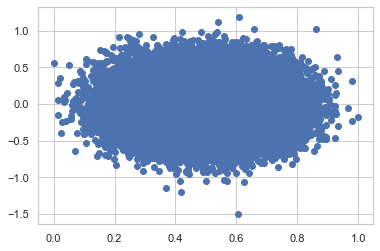

In [40]:
plt.scatter(model.model.exog[:,1], model.resid)

In [41]:
ypred = model.predict(X)
rmse = seval.rmse(Y, ypred)
rmse

0.25191032571757127

In [42]:
Y = allY_df["Y3"].copy()

In [43]:
X=ssm.add_constant(allX_df)

In [45]:
# Y3 OLS R-squared only 0.225
model= ssm.OLS(Y,X).fit()
s = model.summary()
s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y3   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     557.3
Date:                Mon, 01 Mar 2021   Prob (F-statistic):               0.00
Time:                        14:27:58   Log-Likelihood:            -2.3501e+05
No. Observations:              100000   AIC:                         4.701e+05
Df Residuals:                   99947   BIC:                         4.706e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.7644      0.096    122.820      0.000      11.577      11.952
Var1             -3.0136      0.158    -19.047      0.000      -3.324      -2.703
Var2             -0.1451      0.149     -0.972      0.331      -0.438       0.148
Var3              0.4931      0.139      3.544      0.000       0.220       0.766
Var4             -0.0177      0.150     -0.118      0.906      -0.312       0.277
Var5              0.2241      0.168      1.333      0.183      -0.105       0.554
Var6             -0.5961      0.142     -4.188      0.000      -0.875      -0.317
Var7              0.0501      0.145      0.346      0.730      -0.234       0.334
Var8             -0.2836      0.151     -1.884      0.060      -0.579       0.011
Var9             -8.4833      0.167    -50.745      0.000      -8.811      -8.156
Var10            -1.6879      0.149    -11.360      0.000      -1.979      -1.397
Var11            -4.2857      0.148    -28.907      0.000      -4.576      -3.995
Var12             0.2836      0.144      1.970      0.049       0.001       0.566
Var13             0.4146      0.146      2.844      0.004       0.129       0.700
Var14             0.0668      0.208      0.321      0.748      -0.341       0.475
Var15            -0.0514      0.204     -0.252      0.801      -0.451       0.348
Var16            -0.6614      0.193     -3.430      0.001      -1.039      -0.283
Var17            -0.0418      0.158     -0.265      0.791      -0.351       0.268
Var18            -1.9392      0.166    -11.654      0.000      -2.265      -1.613
Var19            -3.2726      0.156    -20.986      0.000      -3.578      -2.967
Var20            -0.2911      0.224     -1.298      0.194      -0.731       0.149
Var21             0.0098      0.201      0.049      0.961      -0.385       0.405
Var22             0.2147      0.193      1.113      0.266      -0.163       0.593
Var23            -0.3911      0.164     -2.380      0.017      -0.713      -0.069
Var24             0.2032      0.202      1.006      0.314      -0.193       0.599
Var25             0.0219      0.215      0.102      0.919      -0.399       0.443
Var26             0.3670      0.224      1.639      0.101      -0.072       0.806
Var27             0.3482      0.229      1.518      0.129      -0.101       0.798
Var28            -0.1988      0.196     -1.017      0.309      -0.582       0.184
Var29            -0.0618      0.189     -0.327      0.744      -0.433       0.309
Var30            -0.1797      0.151     -1.193      0.233      -0.475       0.116
Var31            -2.6882      0.172    -15.598      0.000      -3.026      -2.350
Var32            -0.0895      0.196     -0.456      0.648      -0.474       0.295
Var33            -1.6498      0.201     -8.216      0.000      -2.043      -1.256
CatVar0_PQR       2.8629      0.029     99.593   

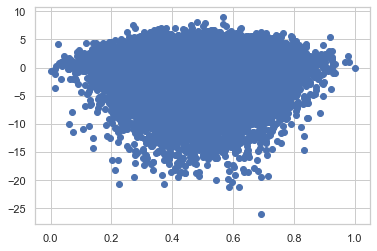

In [46]:
plt.scatter(model.model.exog[:,1], model.resid)

In [47]:
ypred = model.predict(X)
rmse = seval.rmse(Y, ypred)
rmse

2.537532256867793

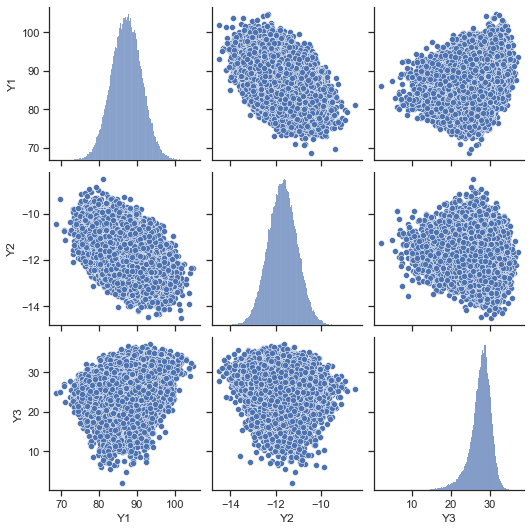

In [48]:
# Y1, Y2 and Y3 - scatterplot matrix
# NOTE: There is a weak (wide), but significant negative correlation between Y1, and Y2
# There appears to be no significant relationship between Y1 or Y2 and Y3
# The data plotted in Y1 v. Y3 and Y2 v. Y3 appears more or less random & cloud-like
sb.set_theme(style="ticks")
sb.pairplot(allY_df)

<AxesSubplot:xlabel='Y1', ylabel='Y2'>

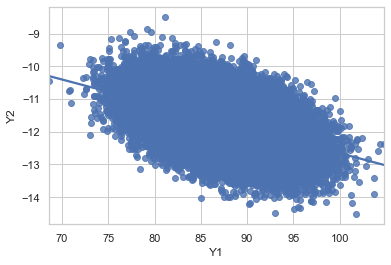

In [49]:
# Regression Plot: Y1 vs. Y2
sb.set_theme(style="whitegrid")
sb.regplot(x = "Y1",
           y = "Y2", 
           ci = None,
           robust = True,
           data = allY_df)

<AxesSubplot:xlabel='Y2', ylabel='Y1'>

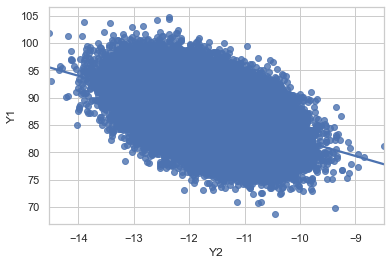

In [50]:
# Regression Plot: Y2 vs. Y1
sb.set_theme(style="whitegrid")
sb.regplot(x = "Y2",
           y = "Y1", 
           ci = None,
           robust = True,
           data = allY_df)

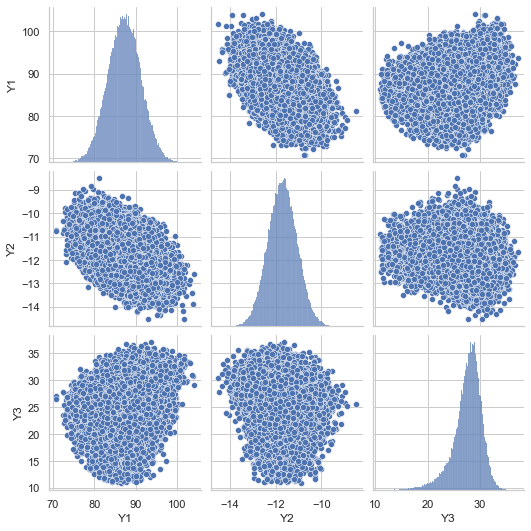

In [51]:
# Filter outliers
# This code by Joe Kington (2012)
# Returns a boolean array with True if points are outliers, and False otherwise
# points = an nxn array of observations, thresh = the modified z-score to use as threshold
# obserations with a modified z-score based on median abs. deviation > the thresh value
# will be classified as outliers
def is_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

# Call it, tighten threshold to 3.1
allY_filtered = allY_df[~is_outlier(allY_df.values, 3.1)]

# Plot the filtered results for comparison with above 
sb.pairplot(allY_filtered)

In [52]:
allY_df.shape

(100000, 3)

In [53]:
# 90 outliers removed
allY_filtered.shape

(99910, 3)

<AxesSubplot:xlabel='Y1'>

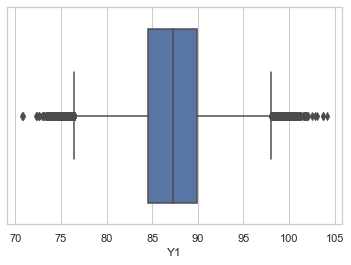

In [54]:
# Box plots for comparison after outliers cleaned by z-score threshold
# NOTE: This is probably not necessary for this data set, as it did not impact OLS modeling at all
# When OLS modeling was repeated on the outlier-filtered dataset, there was no difference in 
# R-squared for any of the models.
sb.set_theme(style="whitegrid")
sb.boxplot(x=allY_filtered["Y1"])

<AxesSubplot:xlabel='Y2'>

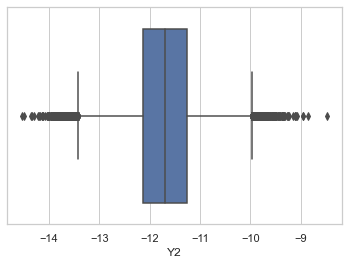

In [55]:
sb.boxplot(x=allY_filtered["Y2"])

<AxesSubplot:xlabel='Y3'>

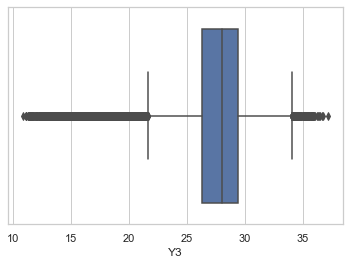

In [56]:
sb.boxplot(x=allY_filtered["Y3"])